In [1]:
from glob import glob
import numpy as np
import pyabf
import matplotlib.pyplot as plt
import matplotlib as mp
from open_abf import plot_swps, get_sweeps, swp_window, get_protocol, files_from_protocol
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.optimize import leastsq
from scipy import integrate
import filtering
%matplotlib widget

In [2]:
pathToData = "/home/alan/Documents/LAB/CSHL/Data/FELIX/"
folders = glob(pathToData+"*")
folders

['/home/alan/Documents/LAB/CSHL/Data/FELIX/20240617 LTP with patched cell',
 '/home/alan/Documents/LAB/CSHL/Data/FELIX/20240615 extracellular recordings',
 '/home/alan/Documents/LAB/CSHL/Data/FELIX/20240614 evoked excitatory-inhibitory postsynaptic currents',
 '/home/alan/Documents/LAB/CSHL/Data/FELIX/20240617 LTP in field potential']

In [3]:
files = glob(folders[2]+"/*.abf")
files

['/home/alan/Documents/LAB/CSHL/Data/FELIX/20240614 evoked excitatory-inhibitory postsynaptic currents/2024_06_14_0016.abf',
 '/home/alan/Documents/LAB/CSHL/Data/FELIX/20240614 evoked excitatory-inhibitory postsynaptic currents/2024_06_14_0015.abf',
 '/home/alan/Documents/LAB/CSHL/Data/FELIX/20240614 evoked excitatory-inhibitory postsynaptic currents/2024_06_14_0012.abf',
 '/home/alan/Documents/LAB/CSHL/Data/FELIX/20240614 evoked excitatory-inhibitory postsynaptic currents/2024_06_14_0013.abf']

In [4]:
get_protocol(files)

['epi', 'epi', 'epi', 'epi']

In [5]:
Glu_files = files_from_protocol('epi',files)
Glu_files

['/home/alan/Documents/LAB/CSHL/Data/FELIX/20240614 evoked excitatory-inhibitory postsynaptic currents/2024_06_14_0016.abf',
 '/home/alan/Documents/LAB/CSHL/Data/FELIX/20240614 evoked excitatory-inhibitory postsynaptic currents/2024_06_14_0015.abf',
 '/home/alan/Documents/LAB/CSHL/Data/FELIX/20240614 evoked excitatory-inhibitory postsynaptic currents/2024_06_14_0012.abf',
 '/home/alan/Documents/LAB/CSHL/Data/FELIX/20240614 evoked excitatory-inhibitory postsynaptic currents/2024_06_14_0013.abf']

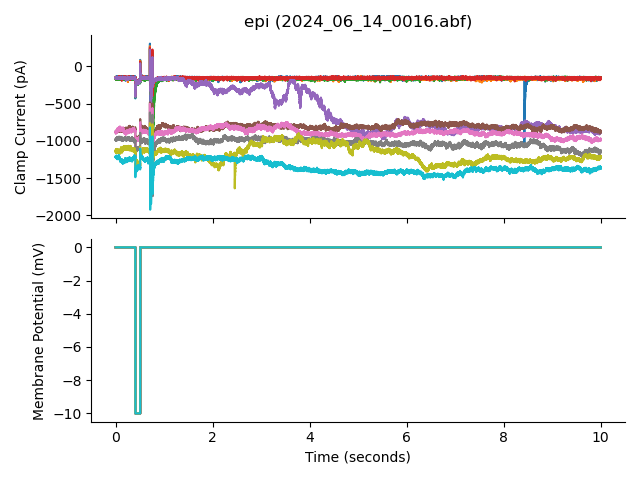

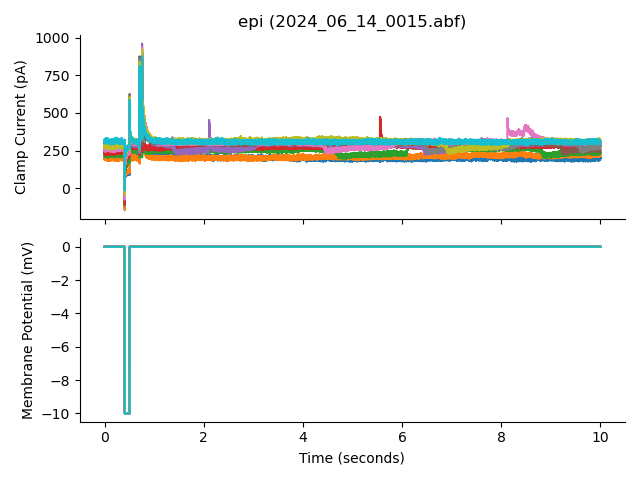

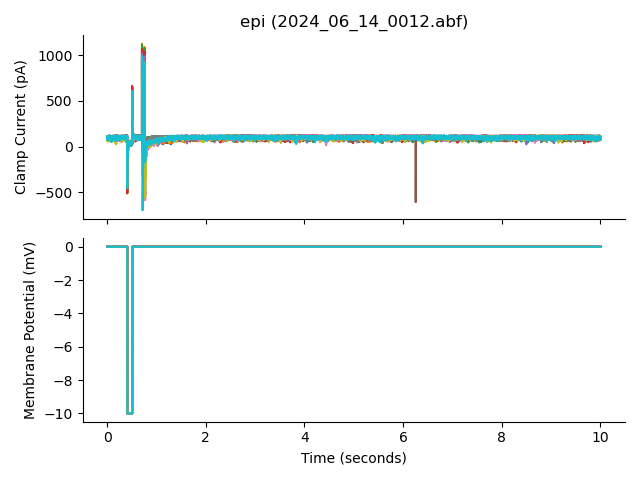

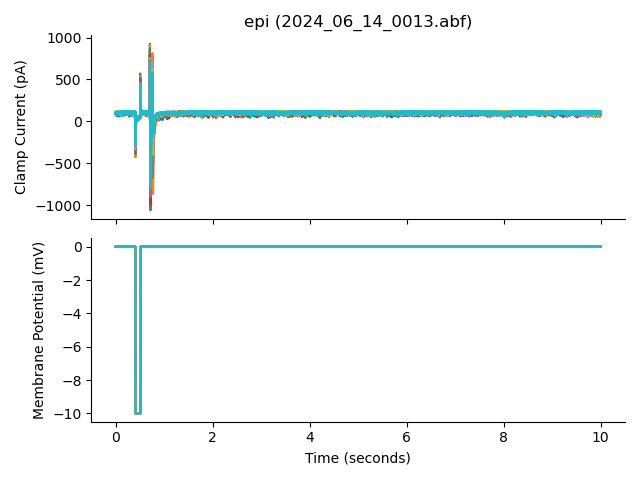

In [6]:
plt.close('all')
for f in Glu_files:
    plot_swps(f)

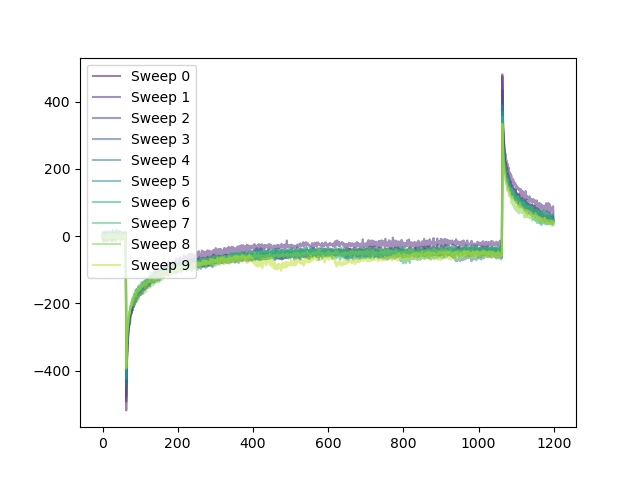

In [8]:
f = Glu_files[-1]
swps, swp_time, sr = get_sweeps(f)
seal_test = swp_window(swps,0.4,0.52,sr,channel=0)
cmap = mp.colormaps['viridis']
fig,ax = plt.subplots()
for i,test in enumerate(seal_test):
    color = cmap(i/len(seal_test))[:-1]
    ax.plot(test - np.mean(test[:10]),alpha=0.5,color=color,label = f'Sweep {i}')
ax.legend()

In [11]:
##  Stim1
## The mean on your current:
i_start = 0.7
i_end = 0.706
current_baseline = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
## the pic response in your current:
i_start = 0.71
i_end = 0.75
current_window = swp_window(swps,i_start,i_end,sr,channel=0)
Stim1_response = np.array([swp[np.argmax(np.abs(swp))] for swp in current_window]) - current_baseline

##  Stim2
## The mean on your current:
i_start = 0.754
i_end = 0.756
current_baseline = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
## the pic response in your current:
i_start = 0.76
i_end = 0.79
current_window = swp_window(swps,i_start,i_end,sr,channel=0)
Stim2_response = np.array([swp[np.argmax(np.abs(swp))] for swp in current_window]) - current_baseline

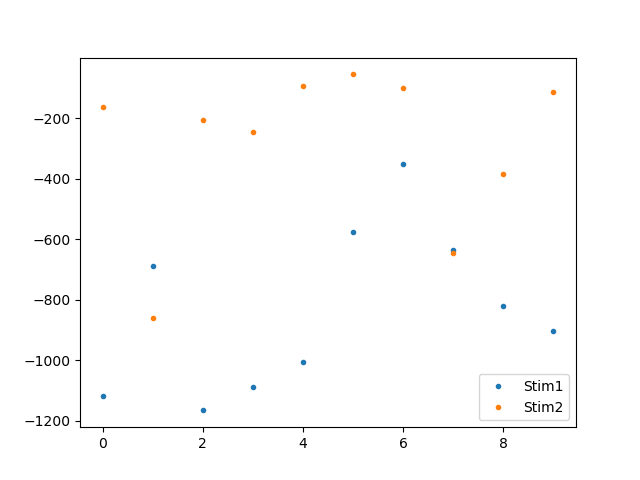

In [15]:
fig,ax = plt.subplots()
ax.plot(Stim1_response,'.',label="Stim1")
ax.plot(Stim2_response,'.',label="Stim2")
ax.legend()

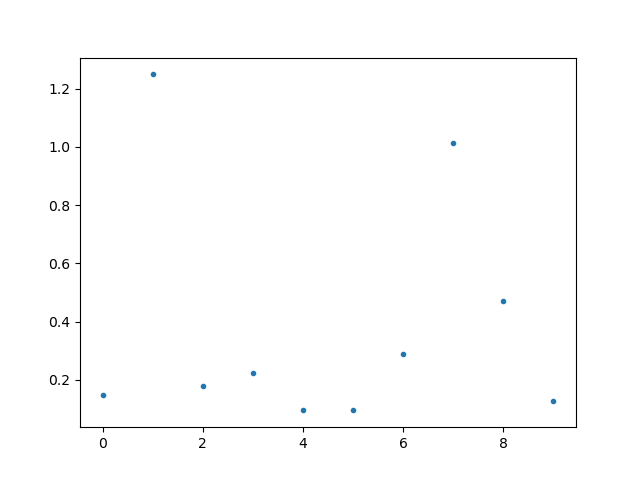

In [16]:
fig,ax = plt.subplots()
ax.plot(Stim2_response/Stim1_response,'.')

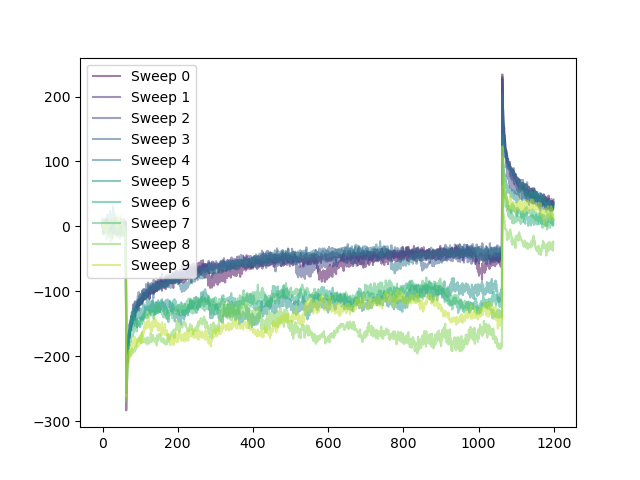

In [23]:
f = Glu_files[0]
swps, swp_time, sr = get_sweeps(f)
seal_test = swp_window(swps,0.4,0.52,sr,channel=0)
cmap = mp.colormaps['viridis']
fig,ax = plt.subplots()
for i,test in enumerate(seal_test):
    color = cmap(i/len(seal_test))[:-1]
    ax.plot(test - np.mean(test[:10]),alpha=0.5,color=color,label = f'Sweep {i}')
ax.legend()

In [24]:
##  Stim1
## The mean on your current:
i_start = 0.7
i_end = 0.706
current_baseline = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
## the pic response in your current:
i_start = 0.71
i_end = 0.75
current_window = swp_window(swps,i_start,i_end,sr,channel=0)
Stim1_response = np.array([swp[np.argmax(np.abs(swp))] for swp in current_window]) - current_baseline

##  Stim2
## The mean on your current:
i_start = 0.754
i_end = 0.756
current_baseline = np.mean(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
## the pic response in your current:
i_start = 0.76
i_end = 0.79
current_window = swp_window(swps,i_start,i_end,sr,channel=0)
Stim2_response = np.array([swp[np.argmax(np.abs(swp))] for swp in current_window]) - current_baseline

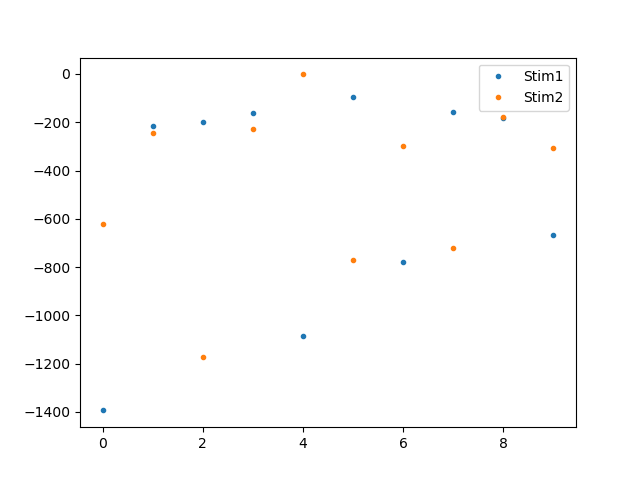

In [25]:
fig,ax = plt.subplots()
ax.plot(Stim1_response,'.',label="Stim1")
ax.plot(Stim2_response,'.',label="Stim2")
ax.legend()

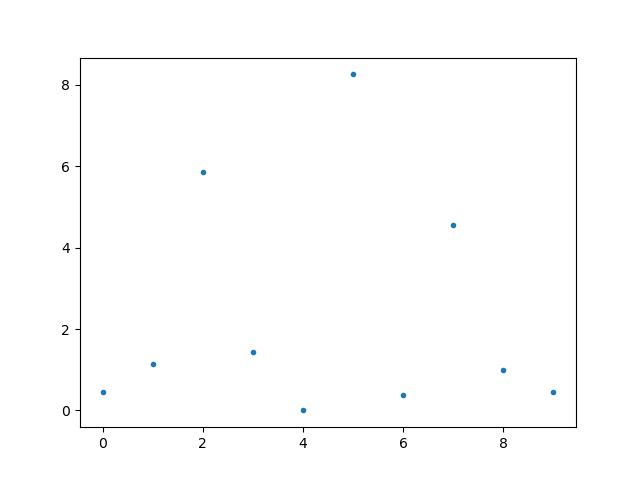

In [26]:
fig,ax = plt.subplots()
ax.plot(Stim2_response/Stim1_response,'.')

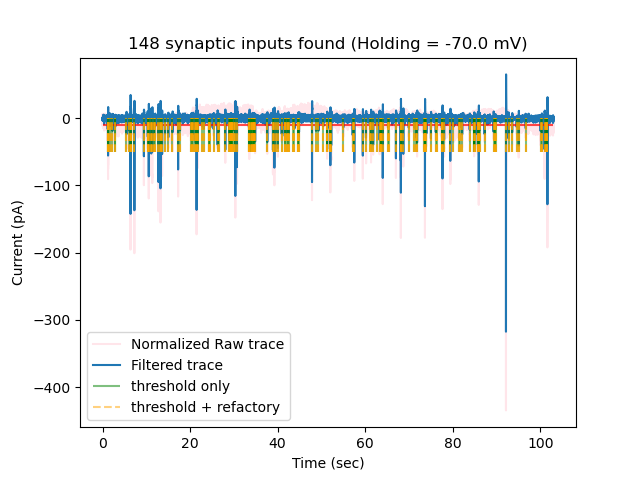

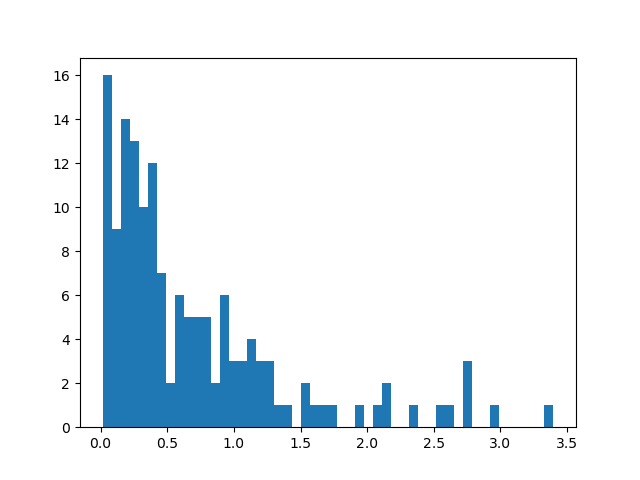

In [27]:
plt.close('all')
trace = np.array([c-np.mean(c[:10]) for c in gap_free]).flatten()
dt = 1/sr
filt = filtering.bandpass(trace, dt*1e3, 0.01,0.1)
thresh = -10
time = np.arange(len(trace))/sr
is_input = (filt[:-1]>thresh) * (filt[1:]<=thresh)
where_input = np.where(is_input)[0]
ref_t = 10e-3
refact = int(ref_t/dt)
ref = 0
where_syn = []
for i in where_input:
    if i<ref:
        continue
    else:
        syn = filt[i:i+refact]
    if syn.max() < thresh:
        continue
    else:
        where_syn.append(i)
        ref = i+refact
where_syn = np.array(where_syn)
isi = np.diff(where_syn)*dt
fig,ax = plt.subplots()
ax.plot(time,trace,alpha=0.4,color='pink',label='Normalized Raw trace')
ax.plot(time,filt,label='Filtered trace')
ax.hlines(thresh,time[1],time[-1],alpha=0.7,color='red',linestyles='solid')
ax.vlines(where_input*dt,-50,0,alpha=0.5,color='green',linestyles='solid')
ax.vlines(where_syn*dt,-50,0,alpha=0.8,color='orange',linestyles='dashed')
#Legend
ax.vlines(0,0,0,alpha=0.5,color='green',linestyles='solid',label='threshold only')
ax.vlines(0,0,0,alpha=0.5,color='orange',linestyles='dashed',label='threshold + refactory')
ax.set_title(f'{len(where_syn)} synaptic inputs found (Holding = {v*10} mV)')
ax.set_ylabel('Current (pA)')
ax.set_xlabel('Time (sec)')
ax.legend()
plt.show()
fig,ax = plt.subplots()
counts,bins = np.histogram(isi,100)
ax.hist(bins[:-1], bins, weights=counts)
ax.set_title(f'Distribution of ISI')
ax.set_xlabel('ISI (s)')
ax.set_ylabel('Number of inputs')
plt.show()

In [65]:
print(f'Minimum ISI : {isi.min()*1e3}')
mean_isi = np.mean(isi)
mean_frq = 1/mean_isi
print(f'Mean frequency = {round(mean_frq,2)} Hz')
std_frq = 1/np.std(isi)
print(f'STD frequency = {round(std_frq,2)}')

Minimum ISI : 14.100000000000001
Mean frequency = 1.46 Hz
STD frequency = 1.44


No ending
No ending
No ending


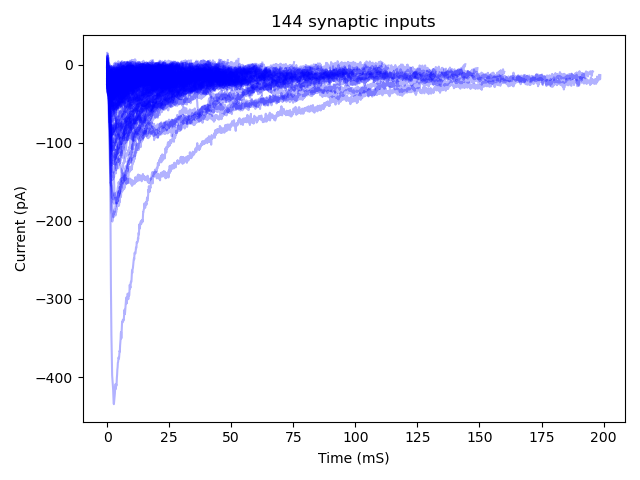

In [40]:
plt.close('all')
base = isi.min() # ms
before = 1 # ms
i_base = int(base/dt)
i_bef = int(before*1e-3/dt)
i_a = int(after/dt)
baseline = np.array([np.mean(trace[i-i_base:i+i_a]) for i in where_syn])
fig,ax = plt.subplots()
synaptic_input = []
for i,s in enumerate(where_syn[:-1]):
    end = isi[i]
    i_e = int(end/dt)
    syn = trace[s: s+i_e] - baseline[i]
    # filt = filtering.lowpass(syn, dt*1e3,0.0001)
    is_end = (syn[:-1]<0) * (syn[1:]>=0)
    try:
        end = np.where(is_end)[0][0]+s
    except:
        print('No ending')
        continue
    syn = trace[s-i_bef:end]
    synaptic_input.append(syn)
    t = np.arange(len(syn))*dt
    ax.plot(t*1e3,syn,alpha=0.3,color='blue')
ax.set_title(f'{len(synaptic_input)} synaptic inputs')
ax.set_xlabel('Time (mS)')
ax.set_ylabel('Current (pA)')
fig.tight_layout()
plt.show()

In [74]:
rise = []
decay = []
area = []
for syn in synaptic_input:
    r = np.argmax(syn)
    decay.append(syn[r:])
    rise.append(syn[:r])
    # area.append(np.sum(syn)*1e-3) # na 
    area.append(integrate.simpson(syn,dx=dt)) # pa*s
area = np.array(area)

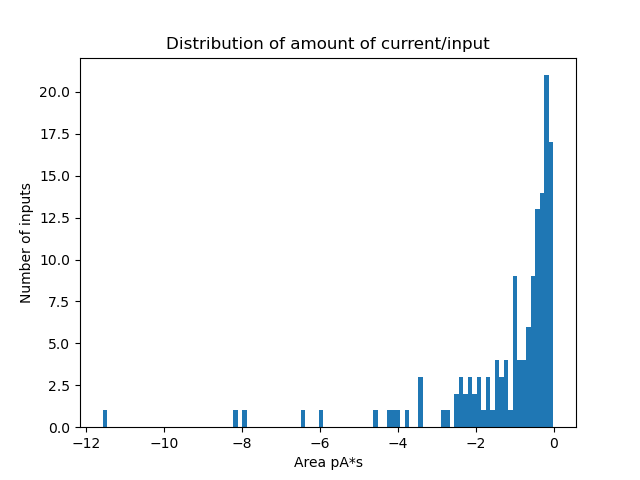

In [75]:
fig,ax = plt.subplots()
counts,bins = np.histogram(area,100)
ax.hist(bins[:-1], bins, weights=counts)
ax.set_title(f'Distribution of amount of current/input')
ax.set_xlabel('Area pA*s')
ax.set_ylabel('Number of inputs')
plt.show()

In [77]:
def fit_exp(x_axis,ydata,p_guess,p_gain):
    def fun_exp(x, p, p_gain):
        """Fit function for decay: single exponential + offset
        p[0] : amplitude
        p[1] : tau
        """
        ## THIS IS CRUCIAL !
        ## for a good fit you need to have the 
        ## params in the range of ~ 1-10 idealy
        amp = p[0] * p_gain[0] ## should be pA
        tau = p[1] * p_gain[1] ## should be sec
        return 1 - (amp*np.exp(-x/tau))
    
    def minimize_fun(p, x, y, p_gain):
        return y-fun_exp(x, p, p_gain)
    
    x = x_axis
    y = ydata
    fit_exp = leastsq(minimize_fun, p_guess, args=(x, y, p_gain))
    fit_params = fit_exp[0]
    fit_trace = fun_exp(x,fit_params,p_gain)
    print(f'Amplitude = {round(fit_params[0]*p_gain[0])} pA // Tau = {round(fit_params[1]*p_gain[0],2)} ms')

    return fit_params,fit_trace

In [80]:
def syn_curr(f):
    swps, swp_time, sr = get_sweeps(f)
    swps /= 10
    v = np.mean(swp_window(swps,0.2,12,sr,channel=1))
    v = int(v*10)
    seal_test = swp_window(swps,0.170,0.195,sr,channel=0)
    cmap = mp.colormaps['viridis']
    fig,ax = plt.subplots()
    for i,test in enumerate(seal_test):
        color = cmap(i/len(seal_test))[:-1]
        ax.plot(test - np.mean(test[:10]),alpha=0.5,color=color,label = f'Sweep {i}')
    ax.legend()
    plt.show()
    gap_free = swp_window(swps,0.2,12,sr,channel=0)
    full_trace = np.array([c-np.mean(c[:10]) for c in gap_free]).flatten()
    dt = 1/sr
    full_filt = filtering.bandpass(full_trace, dt*1e3, 0.025,2)
    if v <= 0:
        thresh = -12
        is_input = (full_filt[:-1]>thresh) * (full_filt[1:]<=thresh)
    elif v >= 40:
        thresh = 12
        is_input = (full_filt[:-1]<thresh) * (full_filt[1:]>=thresh)
    else:
        print(f'Error Holding Voltage is : {v} mV')
        return None
    time = np.arange(len(full_trace))/sr
    where_input = np.where(is_input)[0]
    ref_t = 10e-3
    refact = int(ref_t/dt)
    ref = 0
    where_syn = []
    for i in where_input:
        if i<ref:
            continue
        else:
            syn = full_filt[i:i+refact]
        if syn.max() < thresh:
            continue
        else:
            where_syn.append(i)
            ref = i+refact
    where_syn = np.array(where_syn)
    fig,ax = plt.subplots()
    ax.plot(time,full_trace,alpha=0.4,color='pink',label='Normalized Raw trace')
    ax.plot(time,full_filt,label='Filtered trace')
    ax.hlines(thresh,time[1],time[-1],alpha=0.7,color='red',linestyles='solid',label='Threshold')
    ax.vlines(where_input*dt,-50,0,alpha=0.5,color='green',linestyles='solid')
    ax.vlines(where_syn*dt,-50,0,alpha=0.8,color='orange',linestyles='dashed')
    #Legend
    ax.vlines(0,0,0,alpha=0.5,color='green',linestyles='solid',label='threshold only')
    ax.vlines(0,0,0,alpha=0.5,color='orange',linestyles='dashed',label='threshold + refactory')
    ax.set_title(f'{len(where_syn)} synaptic inputs found (Holding = {v} mV)')
    ax.set_ylabel('Current (pA)')
    ax.set_xlabel('Time (sec)')
    ax.legend()
    plt.show()
    before = 2 # ms
    after = 30 # ms
    i_b = int(before*1e-3/dt)
    i_a = int(after*1e-3/dt)
    synaptic_input = np.array([full_trace[syn_i-i_b:syn_i+i_a]-np.mean(full_trace[syn_i-int(i_b/10)])  
                               for syn_i in where_syn])
    if v <= 0:
        amps = np.min(synaptic_input,axis=1)
    elif v >= 40:
        amps = np.max(synaptic_input,axis=1)
    fig,ax = plt.subplots(2)
    ax[0].plot(synaptic_input.T,alpha=0.3,color='blue')
    ax[0].set_xlabel(f'Points (sampling={sr*1e-3}KHz)')
    ax[0].set_ylabel('Current (pA)')
    counts,bins = np.histogram(amps,250)
    ax[1].hist(bins[:-1], bins, weights=counts)
    # ax[1].set_xlim(-200,0)
    ax[1].set_xlabel('Synaptic current amplitude (pA)')
    ax[1].set_ylabel('Number of occurence')
    ax[0].set_title(f'{len(where_syn)} synaptic inputs (Holding = {v} mV)')
    fig.tight_layout()
    plt.show()

/home/alan/Documents/LAB/CSHL/Data/Good/20240614_Slice_evoked/2024_06_14_0007.abf


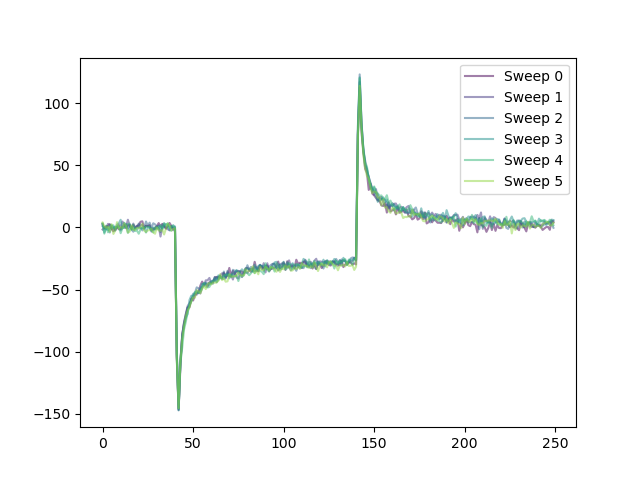

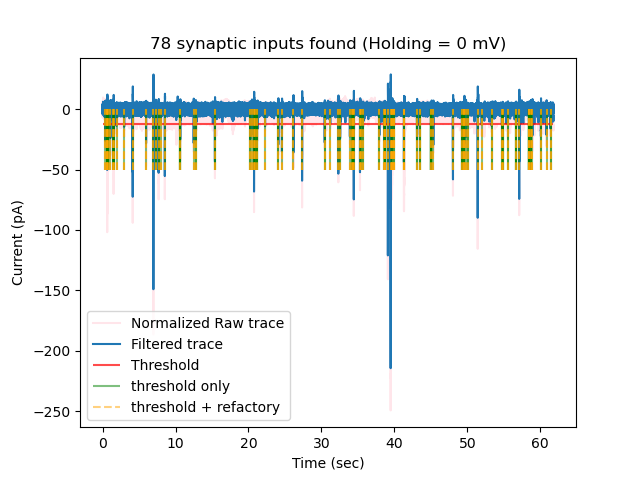

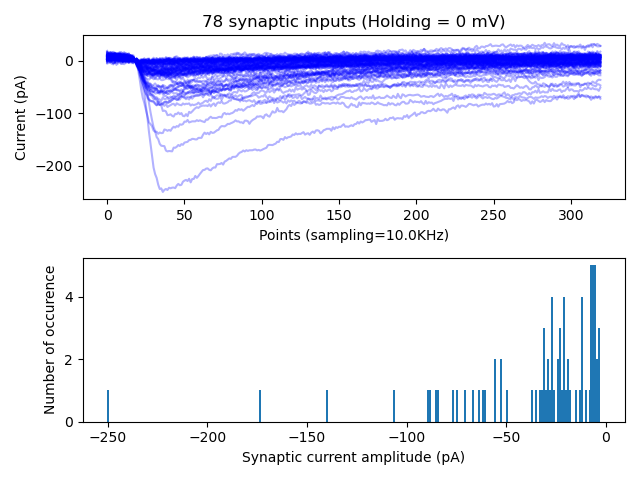

/home/alan/Documents/LAB/CSHL/Data/Good/20240614_Slice_evoked/2024_06_14_0006.abf


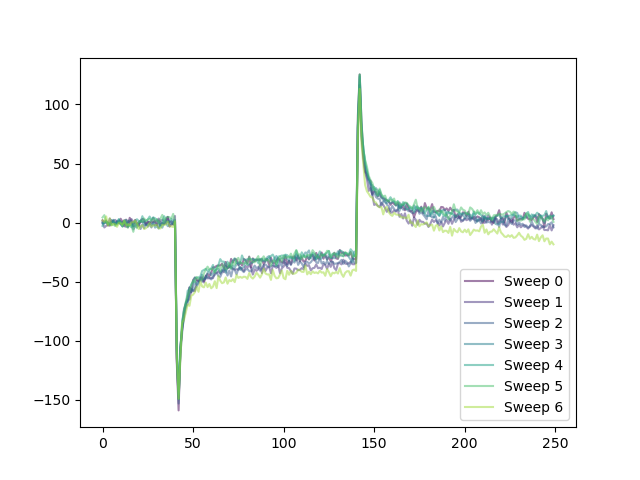

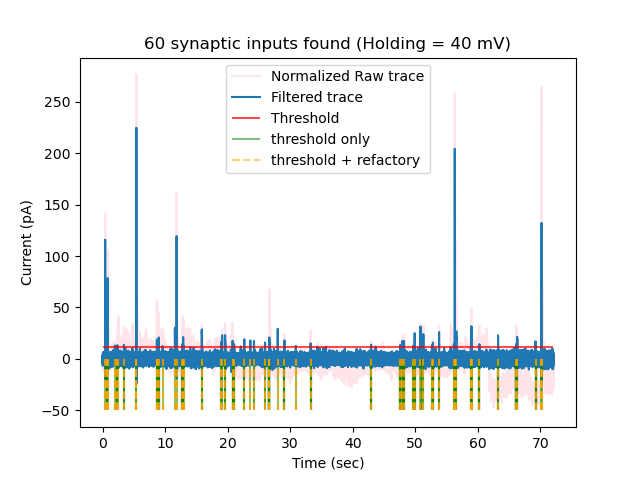

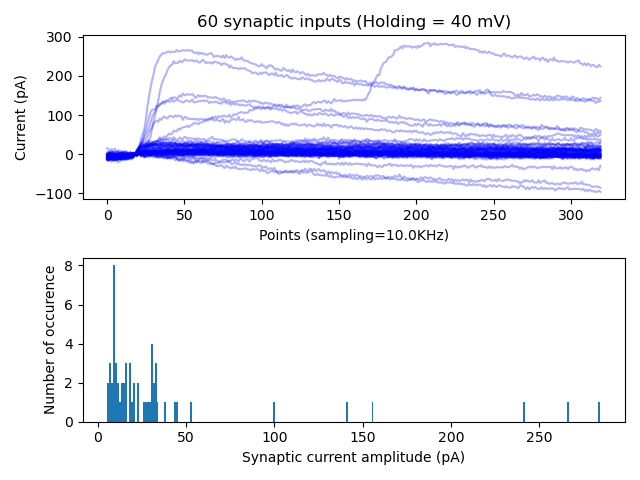

/home/alan/Documents/LAB/CSHL/Data/Good/20240614_Slice_evoked/2024_06_14_0003.abf


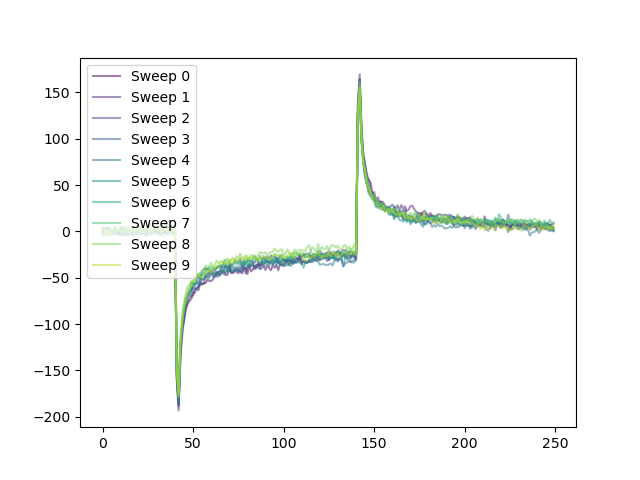

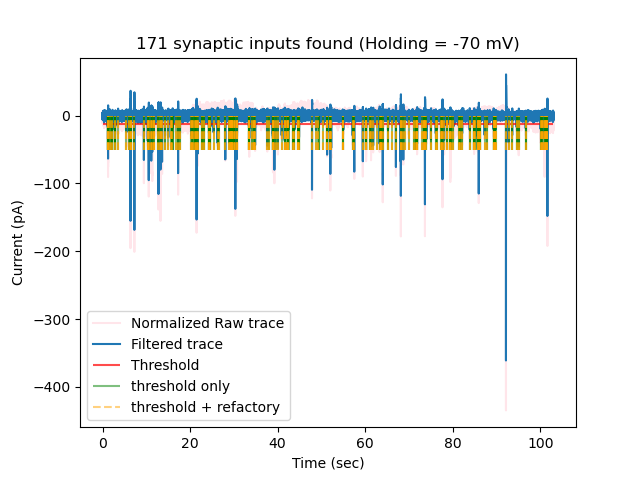

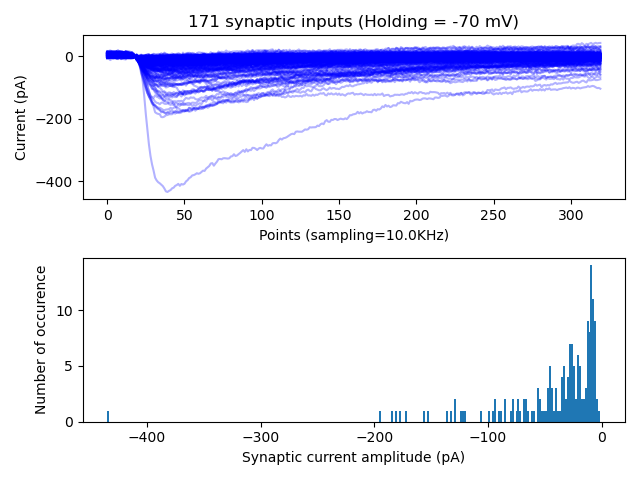

In [81]:
plt.close('all')
for f in Glu_files:
    print(f)
    syn_curr(f)